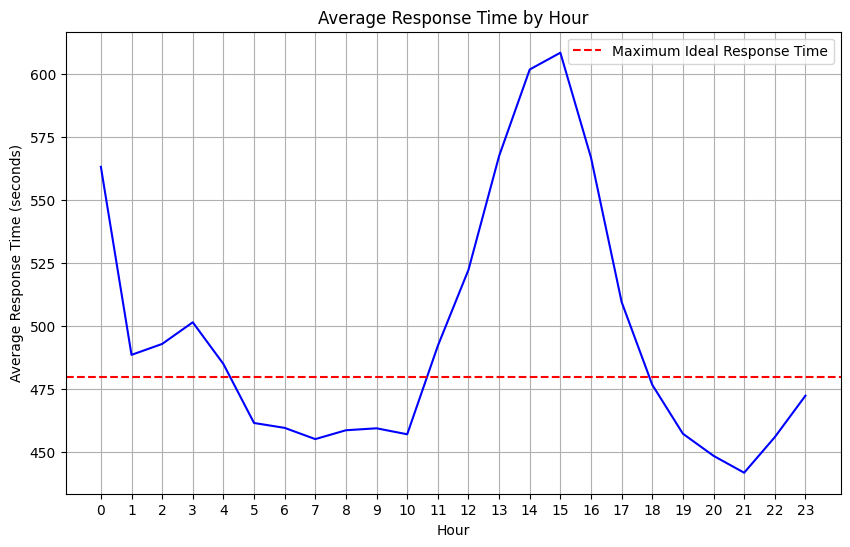

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset into a DataFrame
df = pd.read_csv('dispatch.csv')

# Convert the "INCIDENT_DATETIME" column to datetime data type
df['INCIDENT_DATETIME'] = pd.to_datetime(df['INCIDENT_DATETIME'])

# Extract the hour from the "INCIDENT_DATETIME" column
df['Hour'] = df['INCIDENT_DATETIME'].dt.hour

# Group the data by hour and calculate the mean response time
response_time_hourly = df.groupby('Hour')['INCIDENT_RESPONSE_SECONDS_QY'].mean()

# Plot the average response time by hour
plt.figure(figsize=(10, 6))
plt.plot(response_time_hourly.index, response_time_hourly.values, color='blue')
plt.xlabel('Hour')
plt.ylabel('Average Response Time (seconds)')
plt.title('Average Response Time by Hour')
plt.xticks(range(24))
plt.grid(True)

# Add a horizontal line at y=480
plt.axhline(y=480, color='red', linestyle='--', label='Maximum Ideal Response Time')

plt.legend()
plt.show()


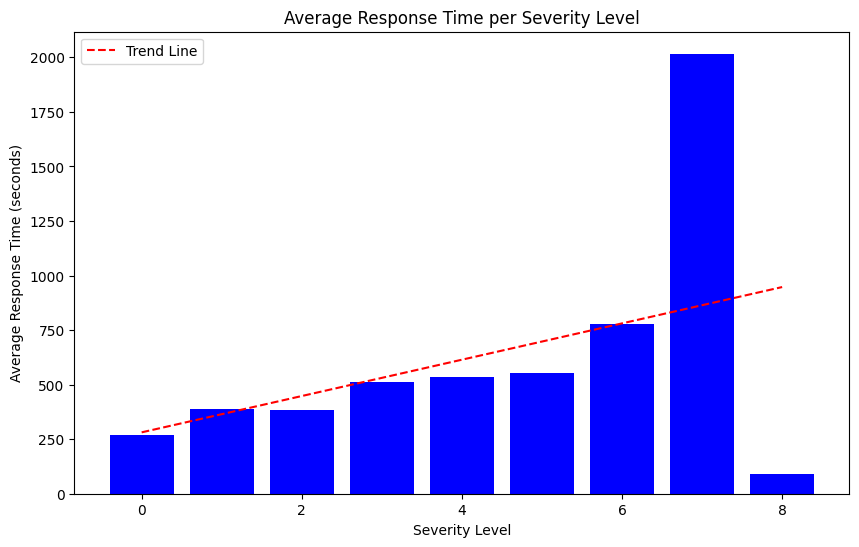

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the dataset into a DataFrame
df = pd.read_csv('dispatch.csv')

# Calculate the average response time per INITIAL_SEVERITY_LEVEL_CODE
avg_response_time = df.groupby('INITIAL_SEVERITY_LEVEL_CODE')['INCIDENT_RESPONSE_SECONDS_QY'].mean()

# Create an array for the x-axis values (severity levels)
x = np.arange(len(avg_response_time))

# Fit a linear regression model to the data
regression = np.polyfit(x, avg_response_time, deg=1)
regression_line = np.poly1d(regression)

# Plot the average response time per severity level with the trend line
plt.figure(figsize=(10, 6))
plt.bar(x, avg_response_time, color='blue')
plt.plot(x, regression_line(x), color='red', linestyle='--', label='Trend Line')
plt.xlabel('Severity Level')
plt.ylabel('Average Response Time (seconds)')
plt.title('Average Response Time per Severity Level')
plt.legend()
plt.show()


In [ ]:

import pandas as pd
import hvplot.pandas
import panel as pn

# Create a sample dataframe
data = pd.DataFrame({'x': [1, 2, 3, 4, 5],
                     'y': [10, 5, 7, 2, 8]})

# Create two plots using hvPlot
scatter_plot = data.hvplot.scatter(x='x', y='y')
line_plot = data.hvplot.line(x='x', y='y')

# Combine the plots into a dashboard using Panel
dashboard = pn.Row(scatter_plot, line_plot)

# Display the dashboard
dashboard.servable()
